In [1]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Cargo el csv

In [2]:
properties = pd.read_csv('mergeGrande.csv', low_memory=False)

In [3]:
properties.dtypes

Unnamed: 0                      int64
country_name                   object
created_on                     object
currency                       object
description                    object
expenses                       object
extra                          object
floor                         float64
geonames_id                   float64
id                             object
image_thumbnail                object
lat                           float64
lat-lon                        object
lon                           float64
operation                      object
place_name                     object
place_with_parent_names        object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
properati_url                  object
property_type                  object
rooms                         float64
state_name                     object
surface_cove

In [4]:
# Convierto la fecha a formato fecha
properties.created_on = pd.to_datetime(properties.created_on)

In [5]:
properties = properties.loc[properties.price > 0, :]

### Top 5 de casas más caras

In [54]:
properties[['price', 'place_name', 'created_on']].sort_values('price', ascending=False).head()

,price,place_name,created_on
147261,241857000.0,Nuñez,2015-08-27
147256,231787500.0,Nuñez,2015-08-27
147257,216180195.0,Nuñez,2015-08-27
147260,207437856.0,Nuñez,2015-08-27
147259,191612768.0,Nuñez,2015-08-27


In [93]:
properties.property_type.unique()

array(['apartment', 'house', 'PH', 'store'], dtype=object)

In [6]:
grouped_by_type = properties.groupby('property_type', as_index=False)
grouped_by_type.describe()

Unnamed: 0                                                               \
       count          mean            std      min         25%        50%   
0    29337.0  1.317369e+06  493006.677803  12948.0  1085791.00  1418908.0   
1   276512.0  1.322734e+06  488347.638160   6394.0  1084243.75  1424062.5   
2   145007.0  1.325930e+06  480741.925932   7448.0  1049805.50  1470017.0   
3     9242.0  1.329075e+06  458277.066574  45711.0  1084363.25  1470891.0   

                            floor               ...    surface_in_m2  \
          75%        max    count       mean    ...              75%   
0  1740171.00  1859563.0   1919.0   3.093278    ...            120.0   
1  1743315.25  1859562.0  80464.0  13.857588    ...             79.0   
2  1733265.50  1859557.0   2995.0  34.745242    ...            614.0   
3  1719382.75  1813614.0    196.0   8.005102    ...            240.0   

            surface_total_in_m2                                              \
        max               count        mean          std  min    25%    50%   
0   19762.0              7378.0  140.287205   779.830105  0.0   60.0   94.0   
1  105000.0             59154.0   90.926480  1259.706717  0.0   40.0   57.0   
2  192014.0             37463.0  503.604223  2379.180525  0.0  160.0  280.0   
3  100000.0              2726.0  273.487161  1969.722251  0.0   40.0  115.0   

                    
     75%       max  
0  144.0   40000.0  
1   87.0  200000.0  
2  550.0  192014.0  
3  285.0  100000.0  

[4 rows x 112 columns]

In [7]:
apartments = grouped_by_type.get_group('apartment')
houses = grouped_by_type.get_group('house')
phs = grouped_by_type.get_group('PH')
stores = grouped_by_type.get_group('store')

In [17]:
len(houses)

145007

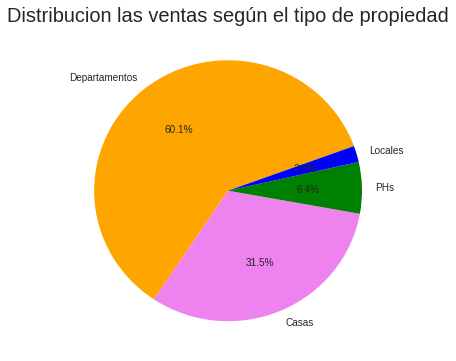

In [19]:
sizes = [len(apartments), len(houses), len(phs), len(stores)]
nombres = ['Departamentos', 'Casas', 'PHs', 'Locales']

plt.figure(figsize=(6, 6))
plt.title('Distribucion de ventas según el tipo de propiedad', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['orange', 'violet', 'green', 'blue'], explode=(0, 0, 0, 0))
plt.show()

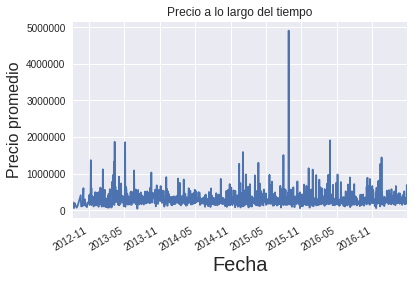

In [9]:
#Precio de cada tipo a lo largo del tiempo.
apartments.groupby('created_on').mean()['price'].plot()

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Precio promedio', fontsize=16)
plt.title('Precio a lo largo del tiempo')
plt.show()

Como se puede ver, existe algún valor en el precio de los departamentos que está fuera del rango normal y eleva exageradamente el promedio para noviembre 2015.

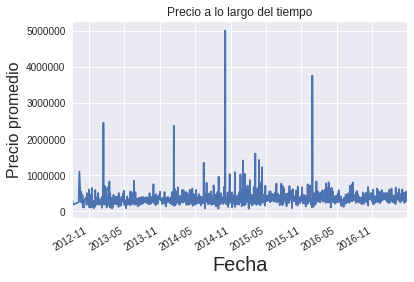

In [10]:
houses.groupby('created_on').mean()['price'].plot()

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Precio promedio', fontsize=16)
plt.title('Precio a lo largo del tiempo')
plt.show()

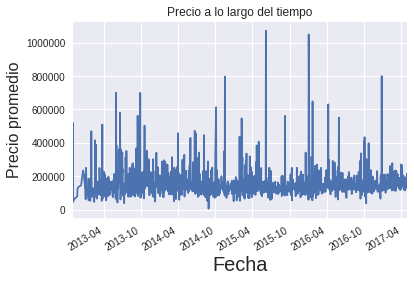

In [11]:
phs.groupby('created_on').mean()['price'].plot()

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Precio promedio', fontsize=16)
plt.title('Precio a lo largo del tiempo')
plt.show()

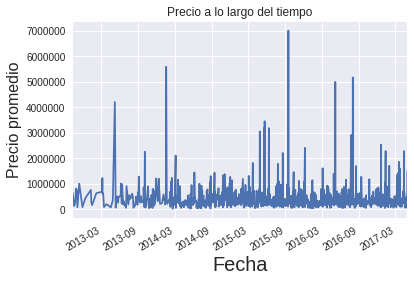

In [12]:
stores.groupby('created_on').mean()['price'].plot()

plt.xlabel('Fecha', fontsize=20)
plt.ylabel('Precio promedio', fontsize=16)
plt.title('Precio a lo largo del tiempo')
plt.show()

In [71]:
grouped_by_place = properties.groupby('place_name').filter(lambda x: len(x) > 6)


In [70]:
len(grouped_by_place)

459516

In [ ]:
grouped_by_place.mean()['price'].describe()